In [1]:
import os
import numpy as np
 

connect to the excel table where are the data

In [2]:
cur_path = os.getcwd()
print(cur_path)
path= os.path.join(cur_path,'landcover.csv')

c:\Users\glode\OneDrive\Desktop\practicas\cosas_datos_python


In [3]:
import csv

we open the table of Excel and save each column

In [7]:
with open(path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    list_of_lists=[[] for k in range(38)]
    for row in csv_reader: #save the names of the columns
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            etiqueta=row
            line_count += 1
        else:
            for i in range(38): #save the data of each column
                list_of_lists[i].append(row[i])
            #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are year, EvergreenConiferousForest, OpenDeciduousBroadleafForest, Shrubland, Mangrove, OpenDeciduousConiferousForest, WaterBody, BareArea, ClosedDecidousBroadleafForest, ClosedDeciduousConiferousForest, BeachDuneAndSand, Grassland, OpenSavanna, DeciduousBroadleafforest, sparseShrubCover, artificialSurface, OpenEvergreenConiferousForest, SparseTreeCover, NonIrregatedArableLandHerbaceous, closedEvergreenConiferousforest, NonIrrigatedArableLand, ClosedSavanna, AgriculturalLandWithNaturalVegetation, evergreeenBroadleadForest, PermanentlyIrrigatedArableLand, DeciduousConferousForest, MixedForest, ComplexCultivationPatternedLand, InlandSwamp, GlacierPerpetualSnow, evergreenShrubland, LichenMoss, DeciduousShrubland", BareRock, SparseVegetation, SparseHerbaceousCover, PermanentCropland, Wetland
Processed 30 lines.


we check if we have created correctly the variable list_of_lists

In [8]:
print(list_of_lists[1])

['23034', '23030', '23030', '22900', '22866', '22774', '22631', '22319', '22135', '22087', '22061', '22005', '21749', '21743', '21679', '21656', '21719', '21640', '21131', '21188', '21024', '20999', '20751', '20745', '20763', '20764', '20814', '20799', '20778']


In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
Year=np.array(list_of_lists[0], dtype=int)

We represent the time series in order to facilitate the time series analysis

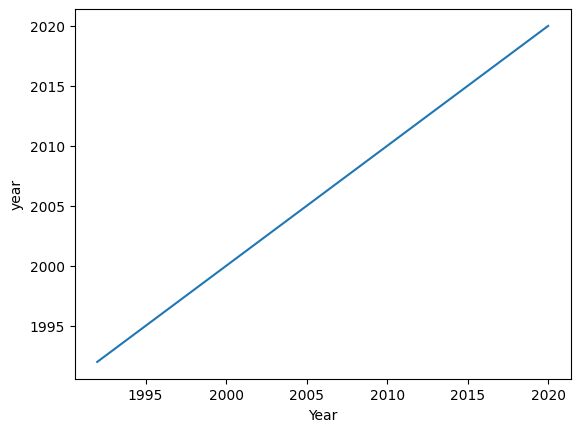

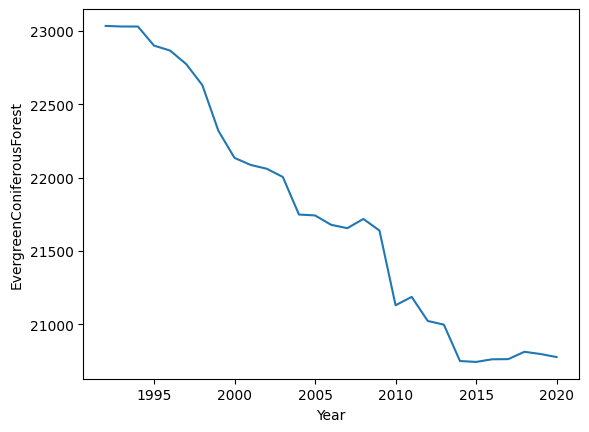

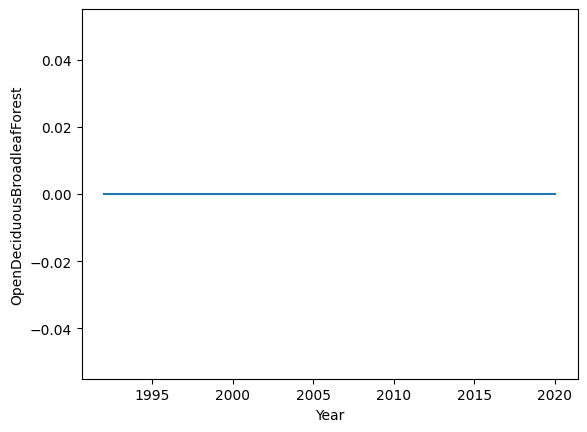

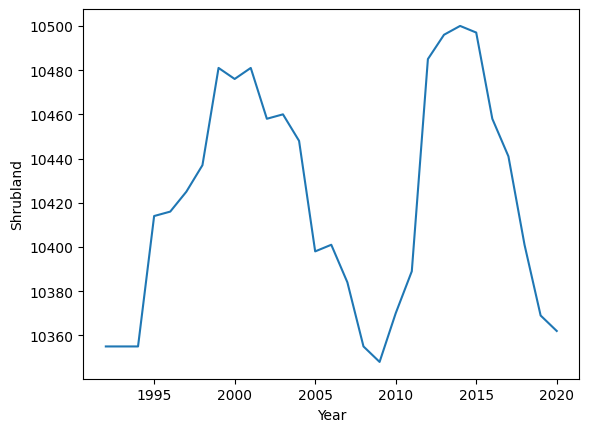

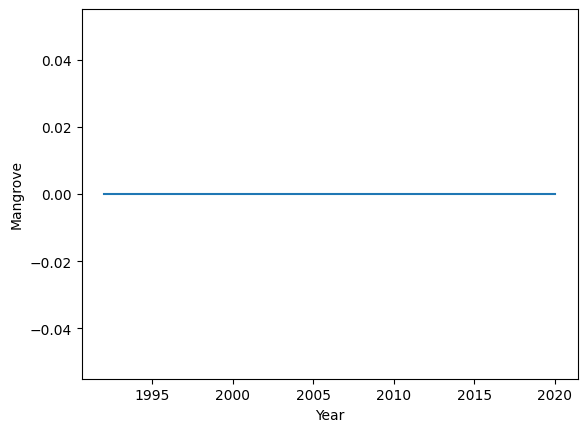

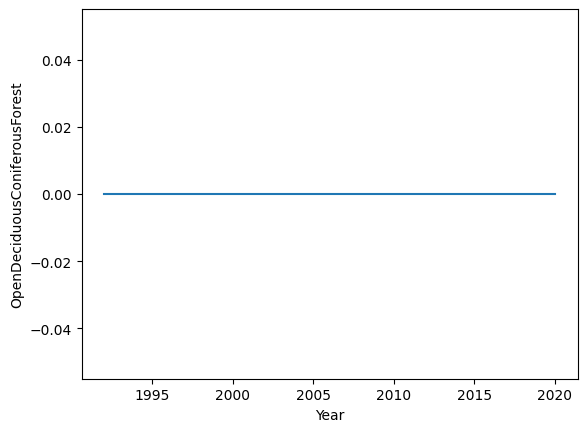

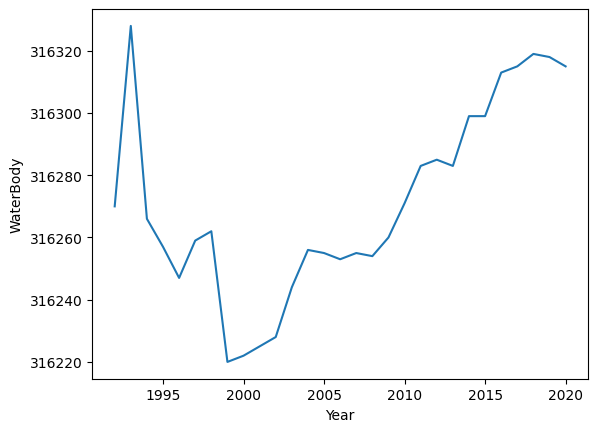

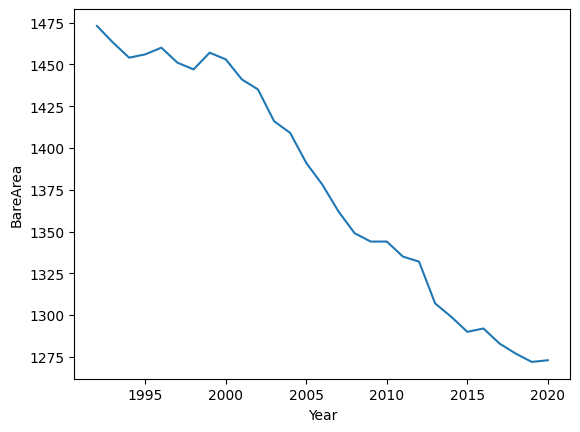

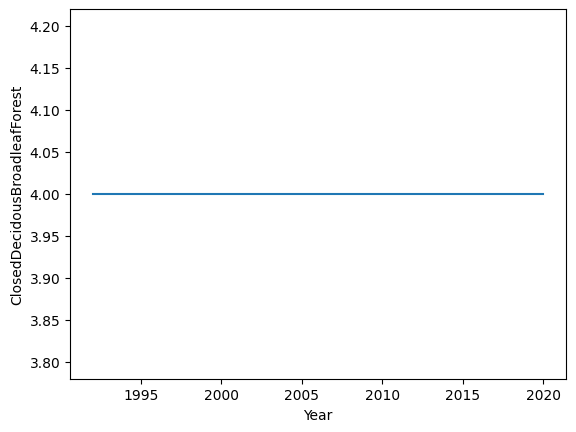

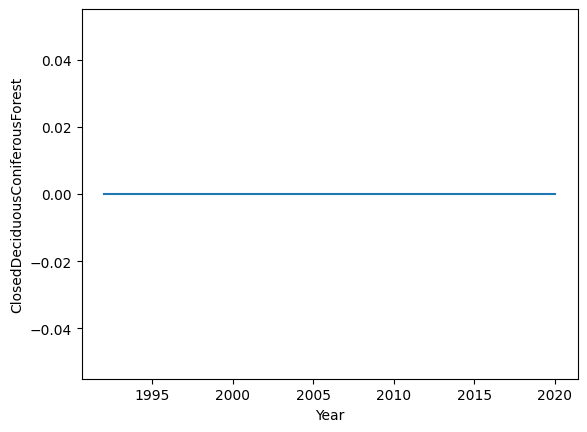

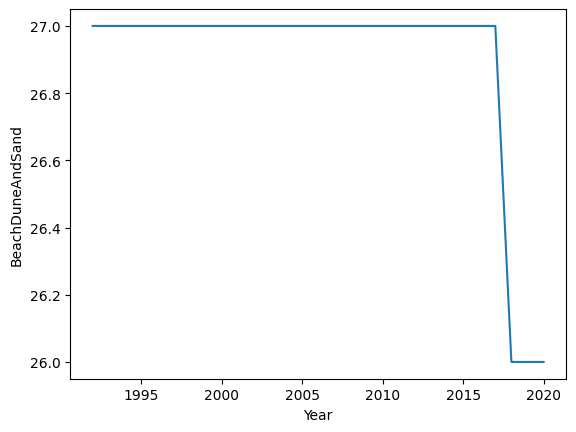

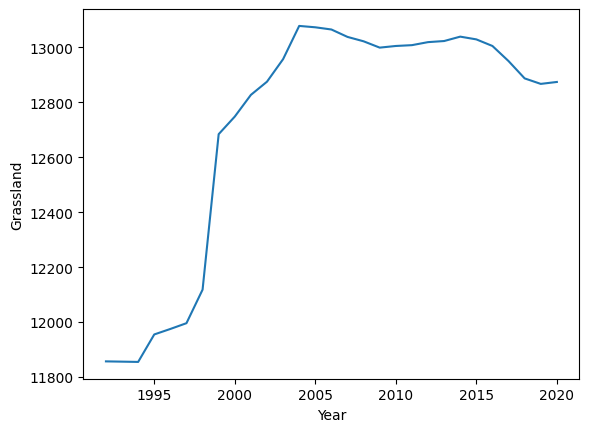

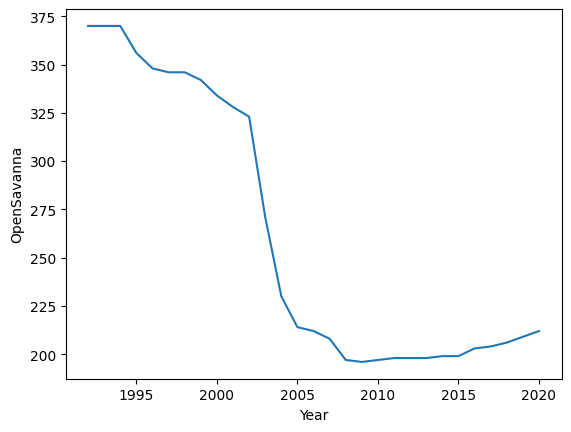

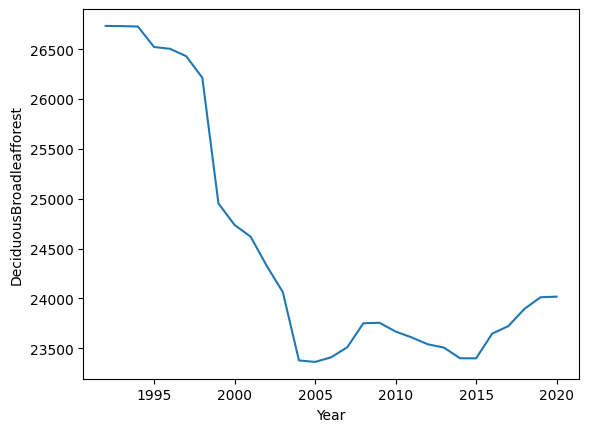

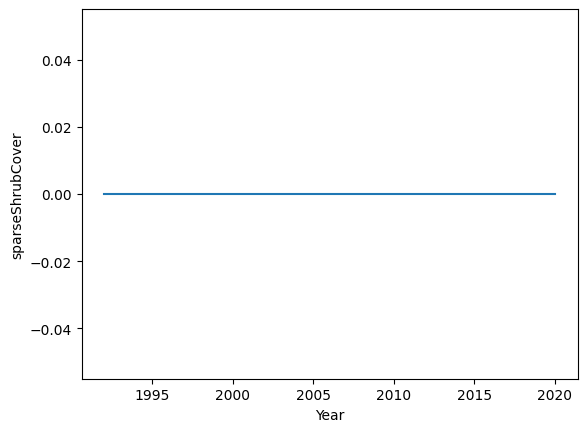

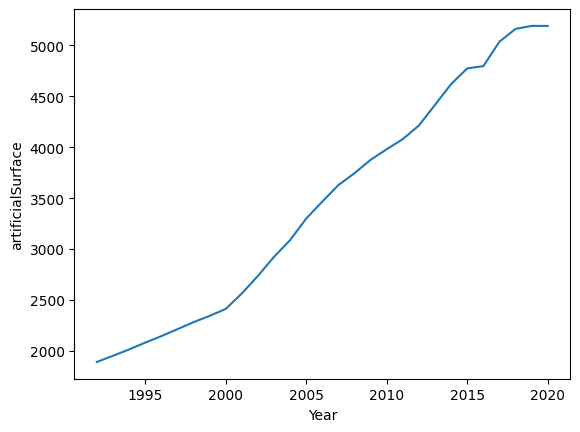

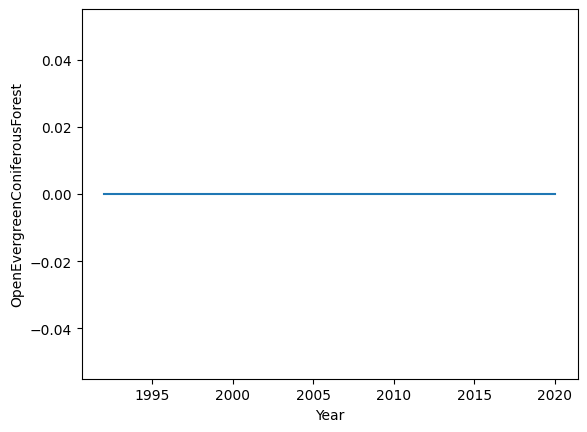

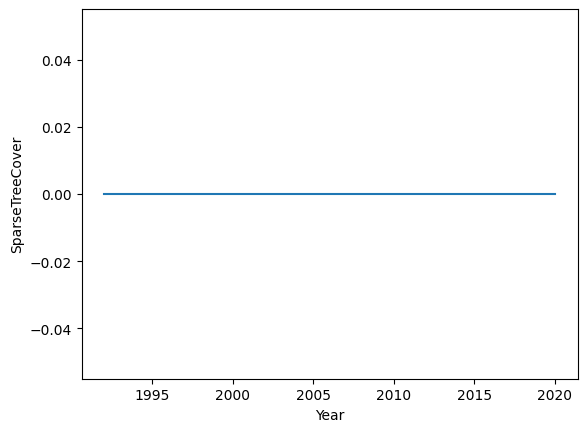

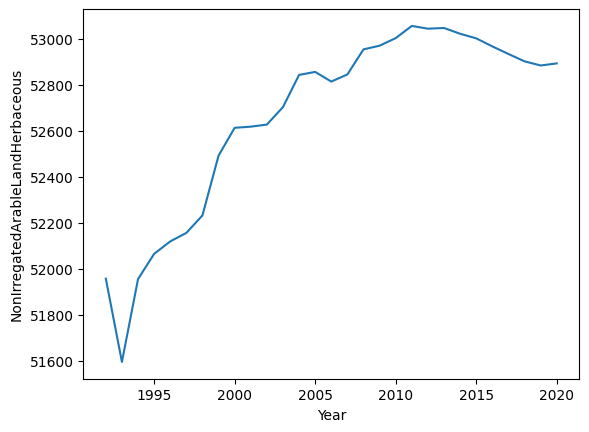

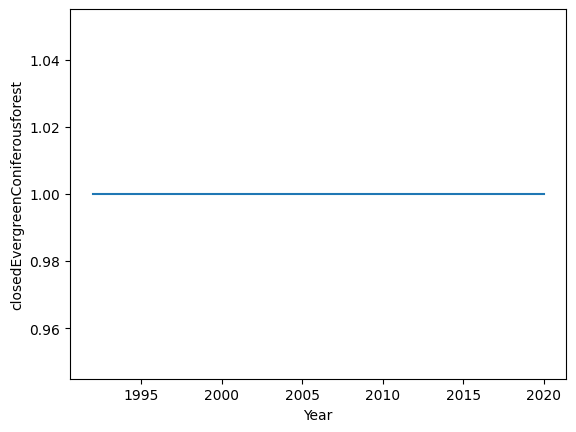

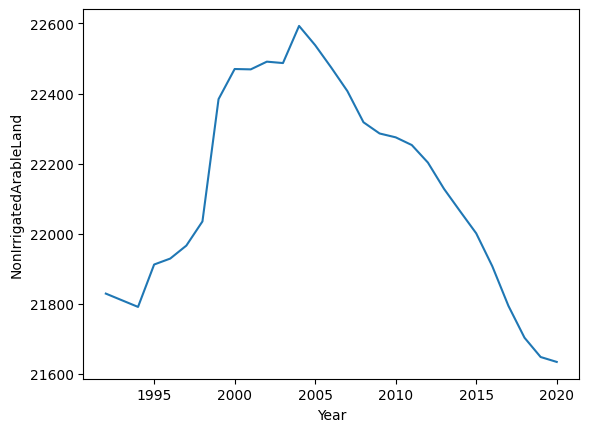

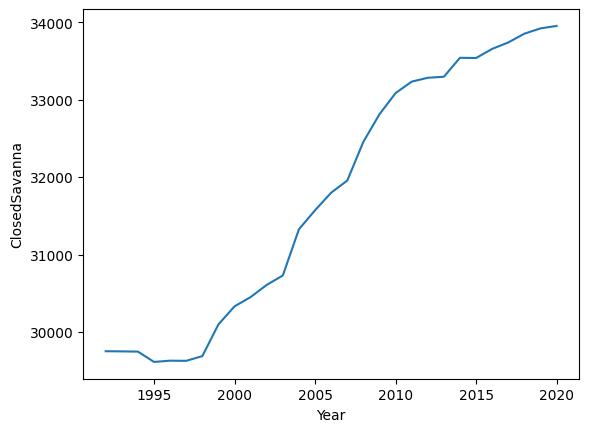

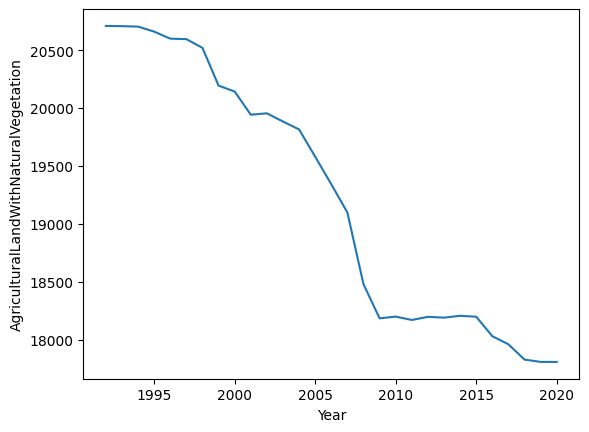

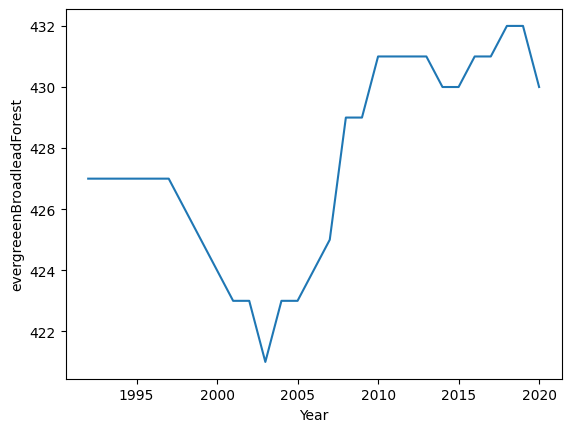

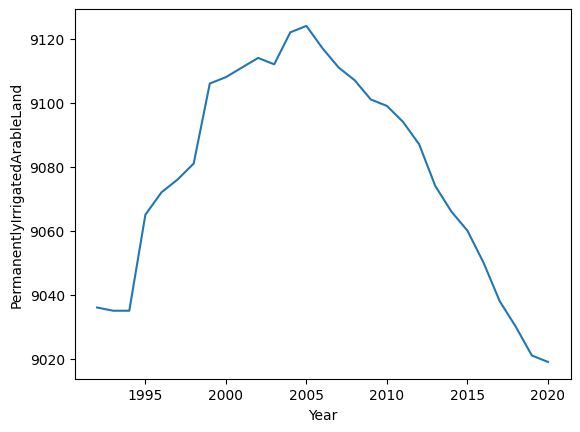

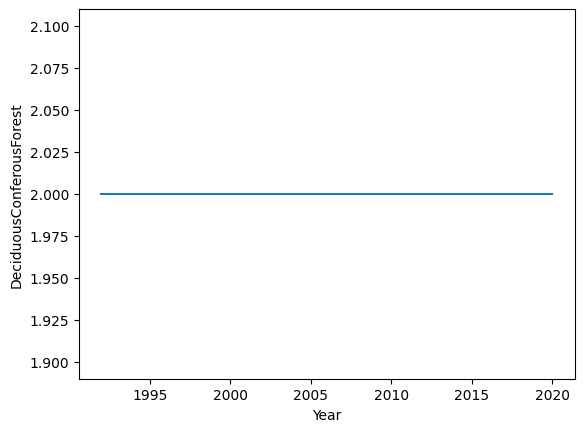

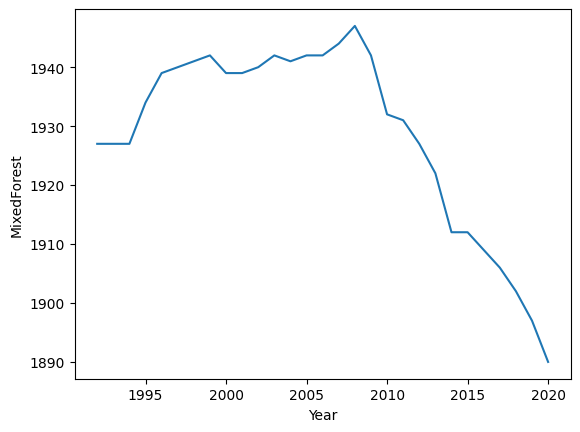

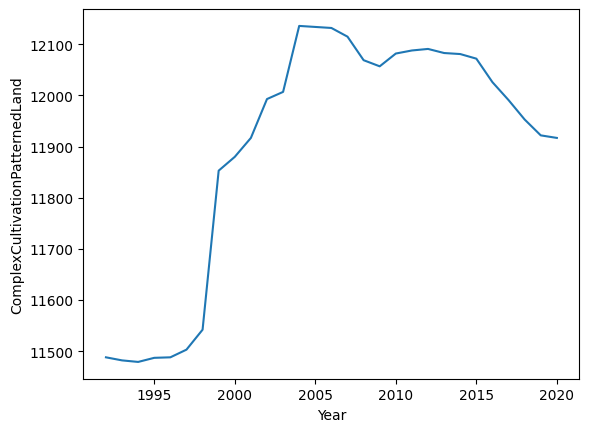

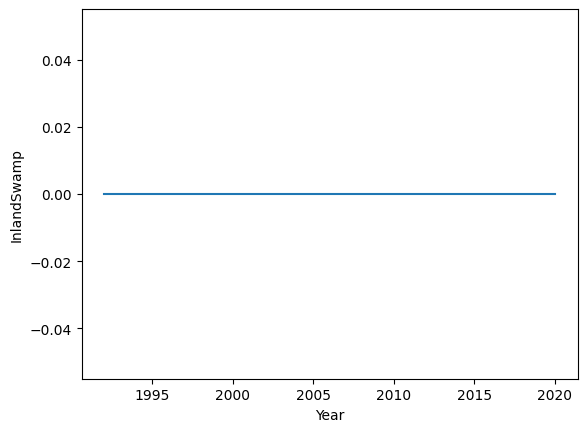

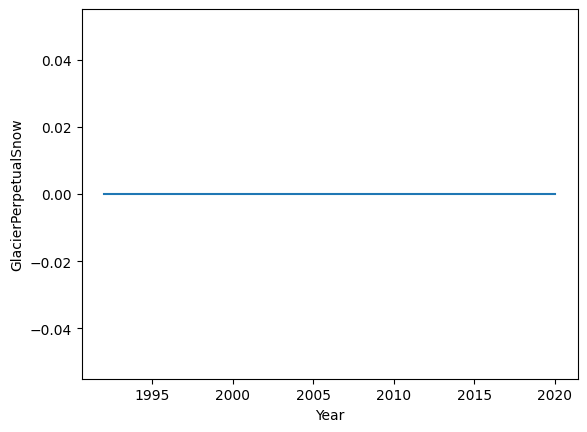

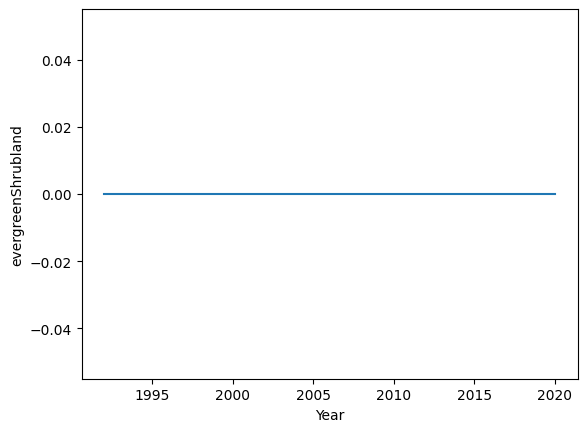

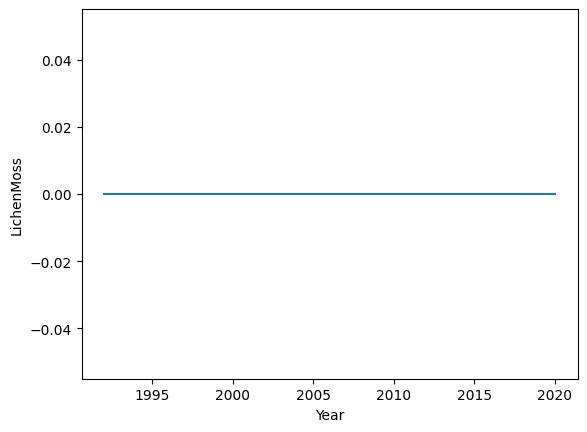

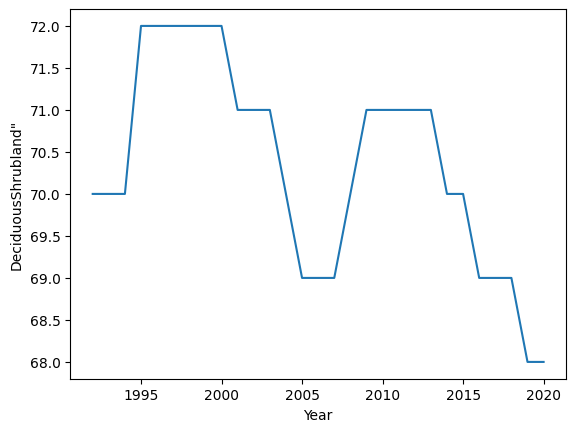

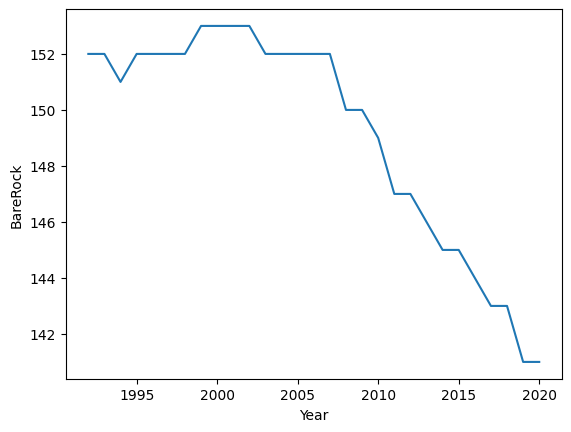

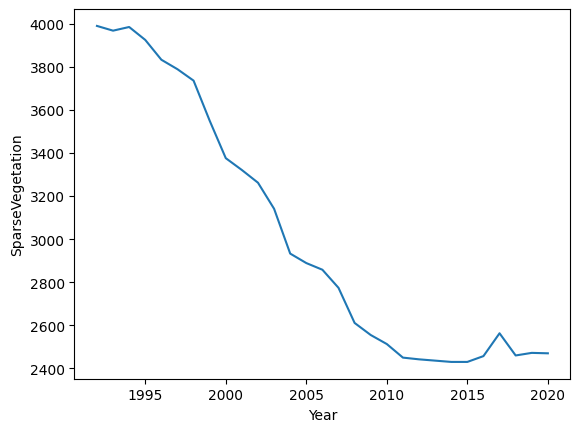

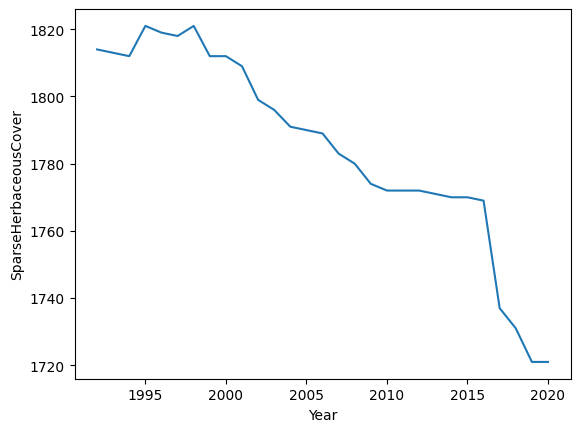

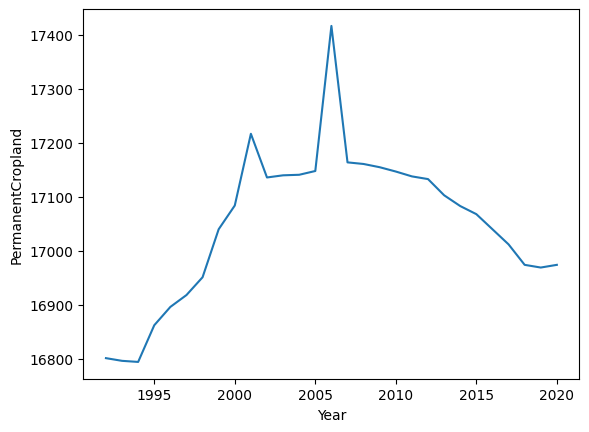

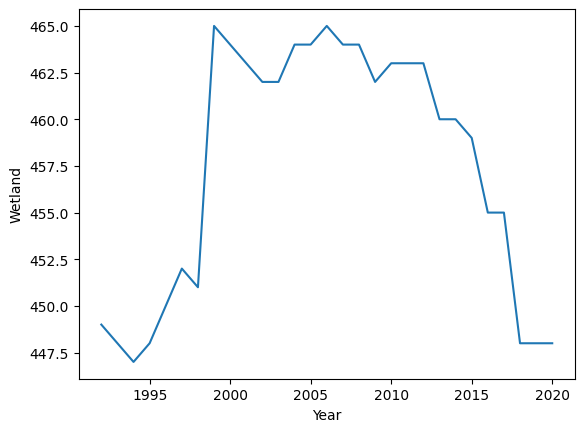

In [11]:

for i in range(38):
    plt.plot(Year,np.array(list_of_lists[i], dtype=int))
    plt.xlabel("Year")
    plt.ylabel(etiqueta[i])
    plt.show()
#Grassland=np.array(list_of_lists[11], dtype=int)

We don't care about time series in possitions 2, 4, 5, 8, 9, 14, 16, 17, 19, ,25, 28, 29, 30 y 31,  because they are constants.

we want the data to be dependent, in order to do this we study the correlation between the different variables using a Ljung-Box contrast test

In [14]:
import statsmodels.api as sm
for i in range(2):
    print(etiqueta[i])
    sm.stats.acorr_ljungbox(np.array(list_of_lists[i], dtype=int), lags=[1], return_df=True)

year
EvergreenConiferousForest


we create a list of lists with the data of each land cover

In [16]:
list=[]
for i in range(38):
    list.append(np.array(list_of_lists[i], dtype=int))

In [18]:
print(etiqueta[3])
verificador=[]
import statsmodels.api as sm
for i in range(38):
    if i!=2 and i!=4 and i!=5 and i!=8 and i!=9 and i!=14 and i!=16 and i!= 17 and i!=19 and i!=28 and i!=29 and i!=30 and i!=31:
        print(sm.stats.acorr_ljungbox(list[i], lags=[1], return_df=True))
        print(etiqueta[i])

Shrubland
     lb_stat     lb_pvalue
1  25.807882  3.771452e-07
year
     lb_stat     lb_pvalue
1  26.792165  2.265540e-07
EvergreenConiferousForest
    lb_stat  lb_pvalue
1  19.34946   0.000011
Shrubland
     lb_stat  lb_pvalue
1  19.264426   0.000011
WaterBody
     lb_stat     lb_pvalue
1  27.114019  1.918020e-07
BareArea
    lb_stat  lb_pvalue
1  14.10002   0.000173
BeachDuneAndSand
     lb_stat     lb_pvalue
1  26.011245  3.394345e-07
Grassland
     lb_stat     lb_pvalue
1  27.863819  1.301611e-07
OpenSavanna
     lb_stat     lb_pvalue
1  26.641215  2.449621e-07
DeciduousBroadleafforest
     lb_stat     lb_pvalue
1  27.037923  1.995028e-07
artificialSurface
     lb_stat     lb_pvalue
1  25.871932  3.648357e-07
NonIrregatedArableLandHerbaceous
     lb_stat     lb_pvalue
1  25.203521  5.158794e-07
NonIrrigatedArableLand
     lb_stat     lb_pvalue
1  28.001643  1.212125e-07
ClosedSavanna
     lb_stat     lb_pvalue
1  27.604518  1.488307e-07
AgriculturalLandWithNaturalVegetation
     l

c:\Users\glode\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


Every temporal serie that is not constant obtains in the Ljung-Box test a p-value less than 0.05, so we can say that there is correlation between the variables and it makes sense that to apply a model

Now we are going to calculate the trend of the time series, in order to become it a stationary serie

We do it by applying the difference operator how many times as needed in order to become a stationary series.
We can see first of all if we need to change another part of the series to become it stationary
If we don't need to change anything more we can calculate how many times we need to apply the difference operator to make a stationary serie.

We create a vector that says how many differences we need to apply in each time series

In [114]:
list_of_diferences=[[] for k in range(37)]
number_of_diferences=[[] for k in range(37)]
for m in range(37):
    if m!=0 and m!=2 and m!=10 and m!=4 and m!=5 and m!=8 and m!=9 and m!=14 and m!=16 and m!= 17 and m!=19 and m!=25 and m!=28 and m!=29 and m!=30 and m!=31:
        list_of_diferences[m]=[[] for k in range(30)]
        list_of_diferences[m][0]=list[m]
        p_valor_trend=sm.tsa.stattools.kpss(list_of_diferences[m][0], regression='ct', nlags='auto', store=False)[1]
        if p_valor_trend>0.05:
            print(str(m)+"It has a part different of the trend to make it stationary")
            number_of_diferences[m]=85
        else:
            print(str(m)+"It has just trend")
            for i in range(1,30):
                for j in range(29-i):
                    #print(j)
                    list_of_diferences[m][i].append(list_of_diferences[m][i-1][j+1]-list_of_diferences[m][i-1][j])
                #print(i)
                #print(list_of_diferences[i])
                p_valor=sm.tsa.stattools.kpss(list_of_diferences[m][i], regression='c', nlags='auto', store=False)[1]
                #print(p_valor)
                if p_valor<0.05:
                    number_of_diferences[m]=i
                    print("It can be stationary with differences of order "+ str(i)+ ", with a p-value of "+str(p_valor))
                    break

1It has a part different of the trend to make it stationary
3It has a part different of the trend to make it stationary
6It has just trend
It can be stationary with differences of order 5, with a p-value of 0.041666666666666546
7It has a part different of the trend to make it stationary
11It has just trend
It can be stationary with differences of order 3, with a p-value of 0.041666666666666366
12It has just trend
It can be stationary with differences of order 5, with a p-value of 0.04635885885885886
13It has just trend
It can be stationary with differences of order 2, with a p-value of 0.041666666666667095
15It has a part different of the trend to make it stationary
18It has just trend
It can be stationary with differences of order 6, with a p-value of 0.04656286721504096
20It has just trend
It can be stationary with differences of order 1, with a p-value of 0.041324663106903775
21It has a part different of the trend to make it stationary
22It has a part different of the trend to make 

C:\Users\glode\AppData\Local\Temp\ipykernel_44740\2118502238.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  p_valor_trend=sm.tsa.stattools.kpss(list_of_diferences[m][0], regression='ct', nlags='auto', store=False)[1]
C:\Users\glode\AppData\Local\Temp\ipykernel_44740\2118502238.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  p_valor=sm.tsa.stattools.kpss(list_of_diferences[m][i], regression='c', nlags='auto', store=False)[1]
C:\Users\glode\AppData\Local\Temp\ipykernel_44740\2118502238.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  p_valor=sm.tsa.stattools.kpss(list_of_diferences[m][i], regression='c', nlags='

In [115]:
last_diference=[[] for k in range(37)]
not_trend=[[] for k in range(37)]
for m in range (37):
    if m!=0 and m!=2 and m!=10 and m!=4 and m!=5 and m!=8 and m!=9 and m!=14 and m!=16 and m!= 17 and m!=19 and m!=25 and m!=28 and m!=29 and m!=30 and m!=31:       
            if number_of_diferences[m]==85:
                print(str(m)+ "has other part")
                not_trend[m]=list_of_diferences[m]
            else:
                print("In "+str(m)+" needs "+ str(number_of_diferences[m])+" diferences")
                last_diference[m]=list_of_diferences[m][number_of_diferences[m]]
                print(list_of_diferences[m][number_of_diferences[m]])


1has other part
3has other part
In 6 needs 5 diferences
[304, -131, 49, 130, -257, 174, -28, -44, 38, 13, -28, -5, 29, -29, 10, -5, 24, -1, -72, 120, -120, 96, -61, 31]
7has other part
In 11 needs 3 diferences
[101, -181, 81, 100, 343, -946, 517, -46, 65, 5, -165, 123, -16, 30, -18, 36, -32, 11, -15, 19, -38, 12, -17, 23, 51, -16]
In 12 needs 5 diferences
[-54, 16, 2, 8, 0, -13, -40, 153, -150, 19, 20, 16, 11, -47, 31, -5, 1, -2, -3, 10, -19, 23, -15, 3]
In 13 needs 2 diferences
[-2, -201, 186, -55, -142, -1045, 1045, 98, -175, 29, -421, 670, 61, 55, 140, -236, -93, 29, -10, 36, -74, 106, 249, -173, 98, -56, -111]
15has other part
In 18 needs 6 diferences
[1493, -100, -629, 1371, -1063, 95, 145, -113, 573, -658, 28, 126, 510, -845, 407, 234, -541, 487, -328, 219, -145, 87, -46]
In 20 needs 1 diferences
[-19, -19, 121, 17, 37, 69, 349, 86, -1, 22, -4, 106, -55, -64, -67, -89, -32, -11, -22, -50, -75, -64, -63, -94, -113, -91, -55, -14]
21has other part
22has other part
23has other part


In [97]:
for m in range(37):
    if number_of_diferences[m]==85:
        print(str(m)+etiqueta[m])

1EvergreenConiferousForest
3Shrubland
7BareArea
15artificialSurface
21ClosedSavanna
22AgriculturalLandWithNaturalVegetation
23evergreeenBroadleadForest
32DeciduousShrubland"
35SparseHerbaceousCover


create a vector with the number of the time series with just trend

In [144]:
trend=[]
not_just_trend=[]
for m in range(37):
    if m!=0 and m!=2 and m!=10 and m!=4 and m!=5 and m!=8 and m!=9 and m!=14 and m!=16 and m!= 17 and m!=19 and m!=25 and m!=28 and m!=29 and m!=30 and m!=31 and m!=34 and m!=36:       
        if number_of_diferences[m]!=85:
            trend.append(m)
        else:
            not_just_trend.append(m)
print(trend)
print(not_just_trend)

[6, 11, 12, 13, 18, 20, 24, 26, 27, 33]
[1, 3, 7, 15, 21, 22, 23, 32, 35]


plot the diference time series data of the time series that have only trend component

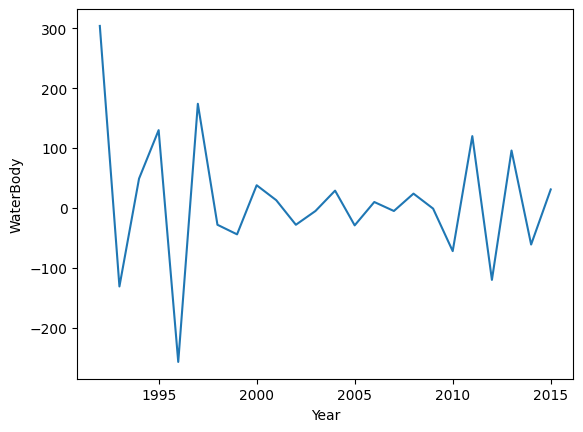

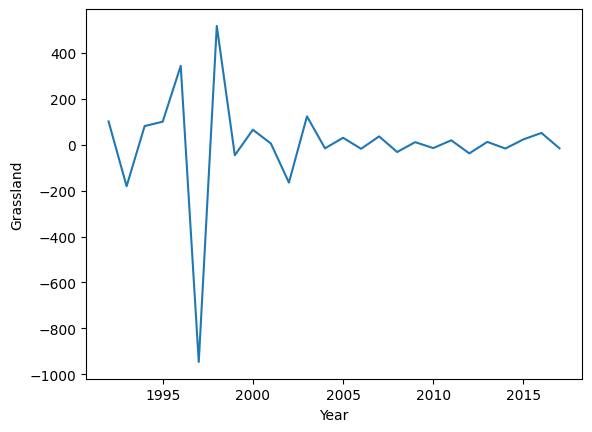

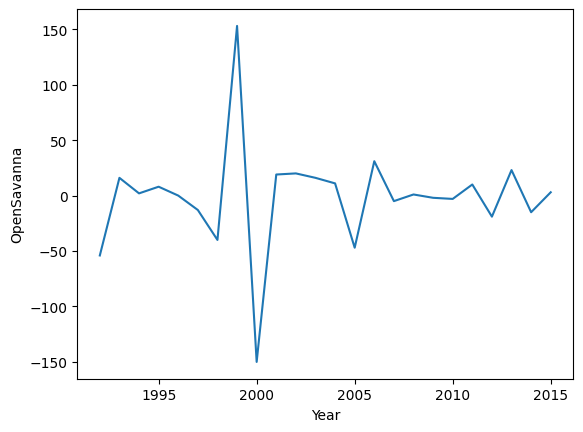

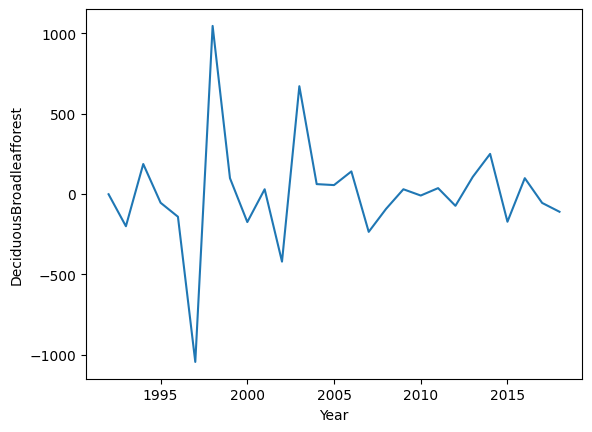

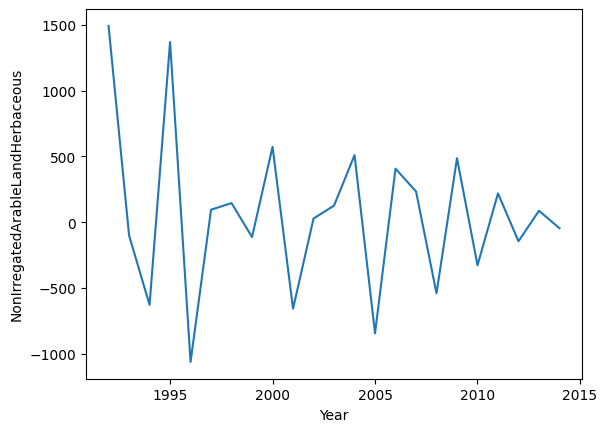

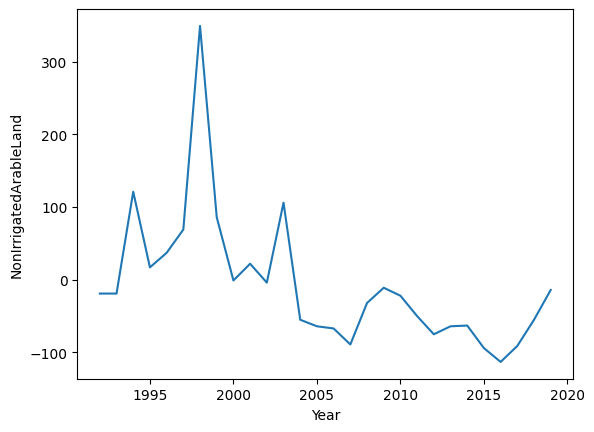

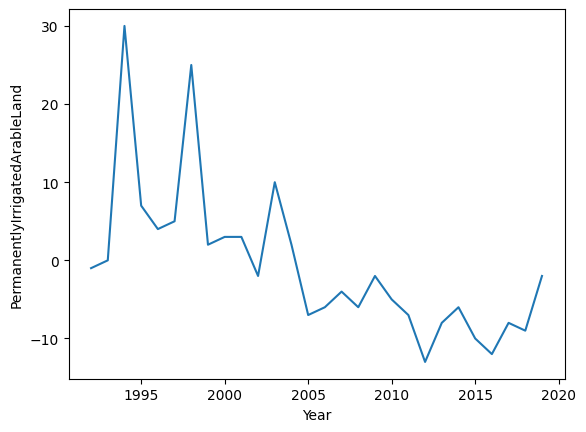

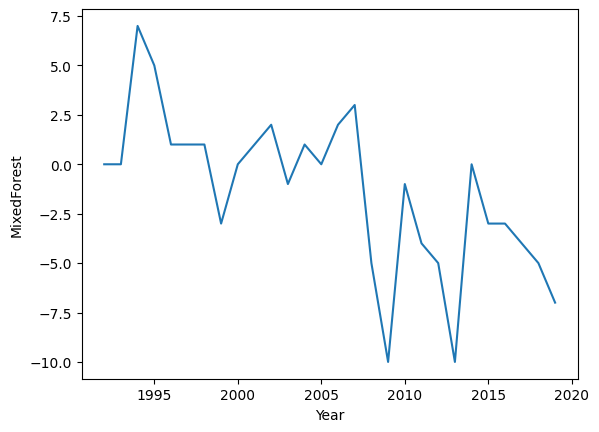

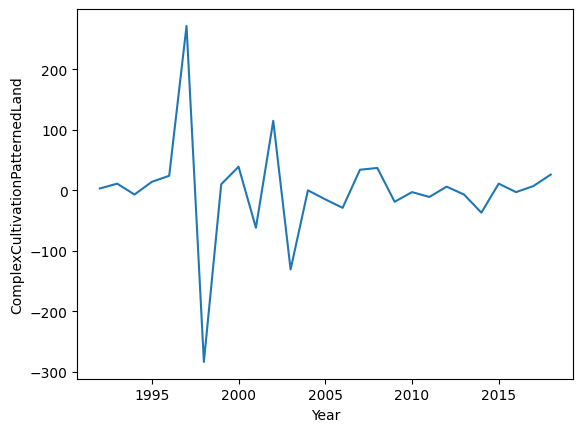

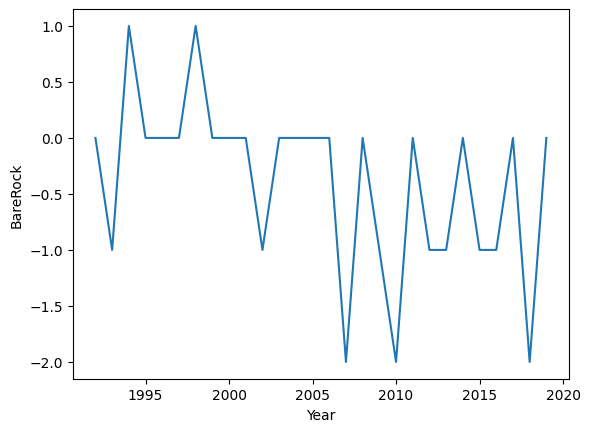

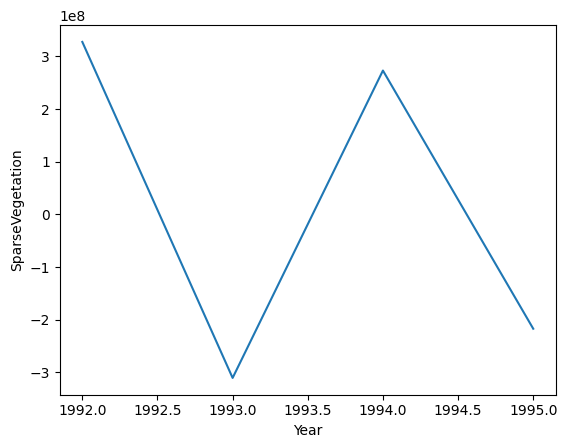

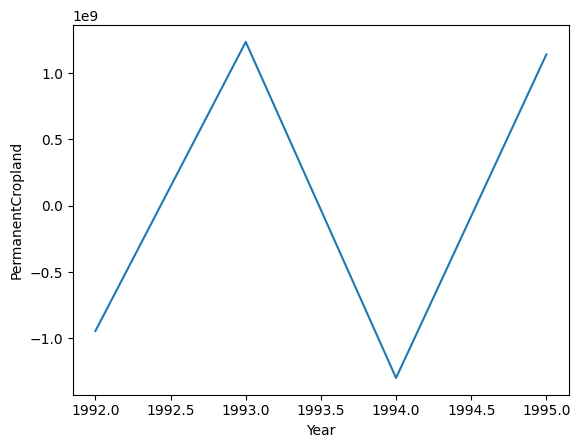

In [122]:
for m in trend:
            plt.plot(Year[0:len(Year)-number_of_diferences[m]],np.array(last_diference[m], dtype=int))
            plt.xlabel("Year")
            plt.ylabel(etiqueta[m])
            plt.show()
#Grassland=np.array(list_of_lists[11], dtype=int)

ACF and PACF plots for determining ARIMA orders

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF plot

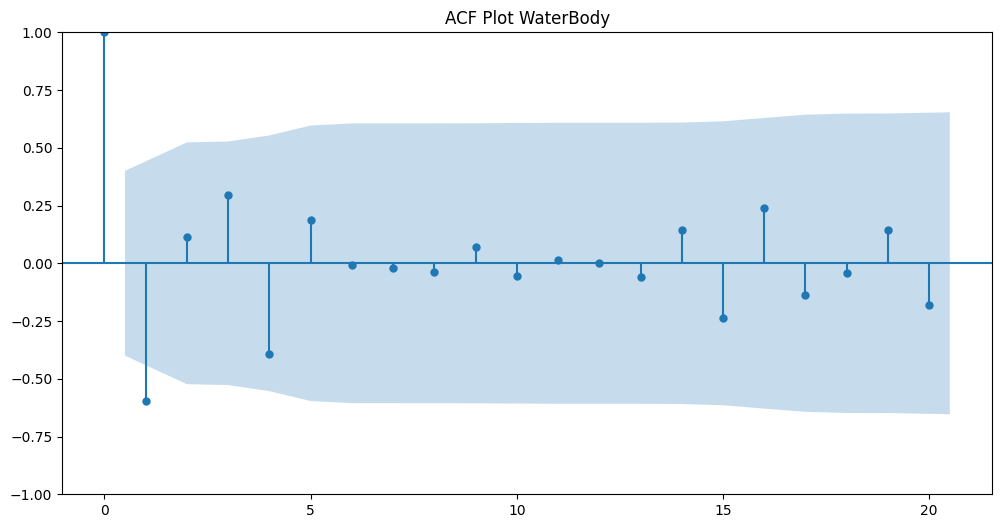

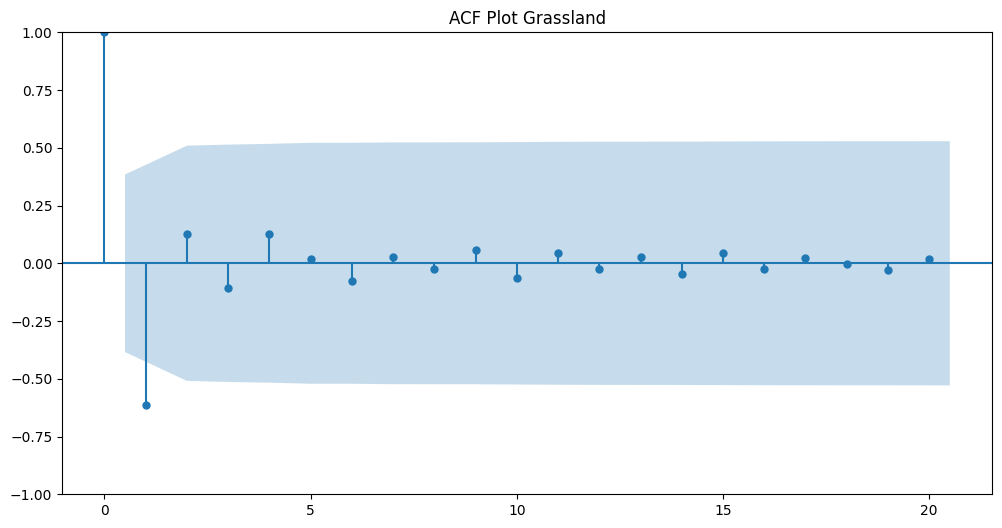

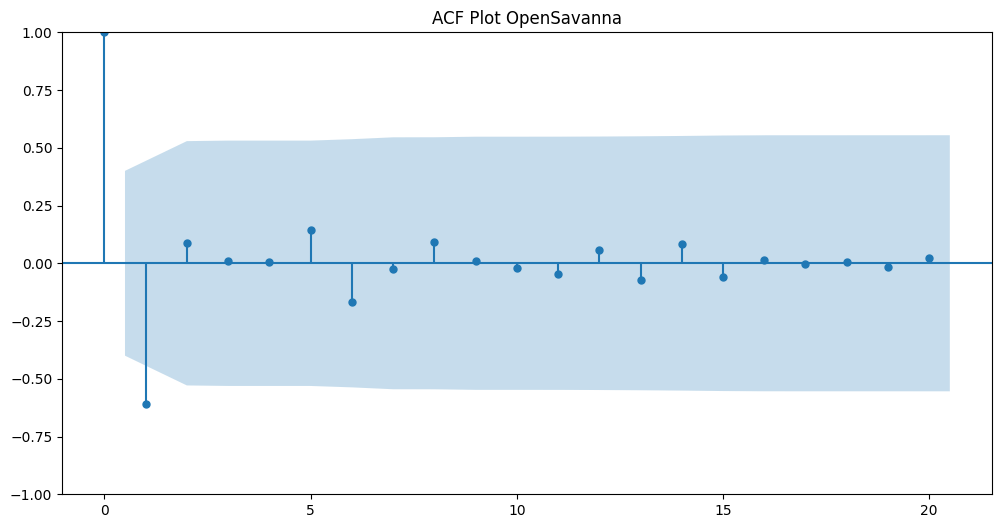

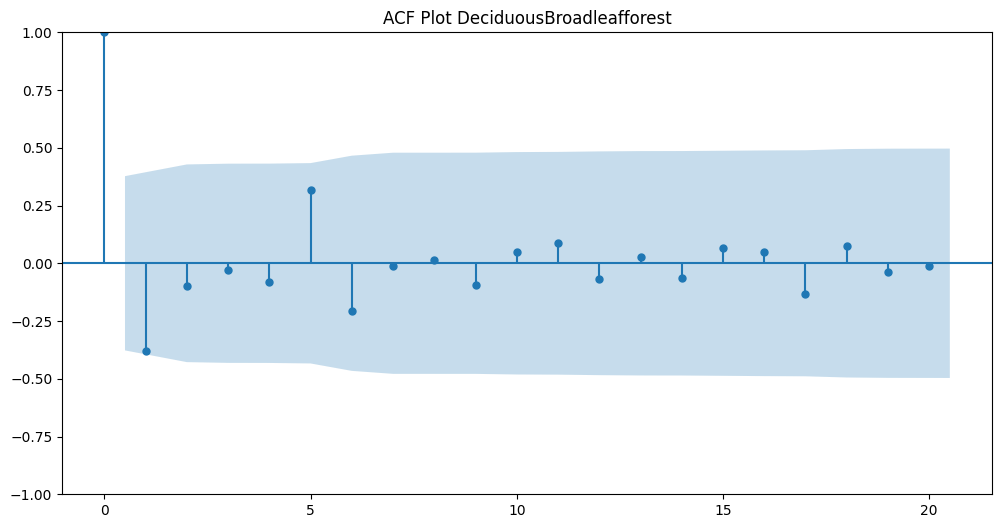

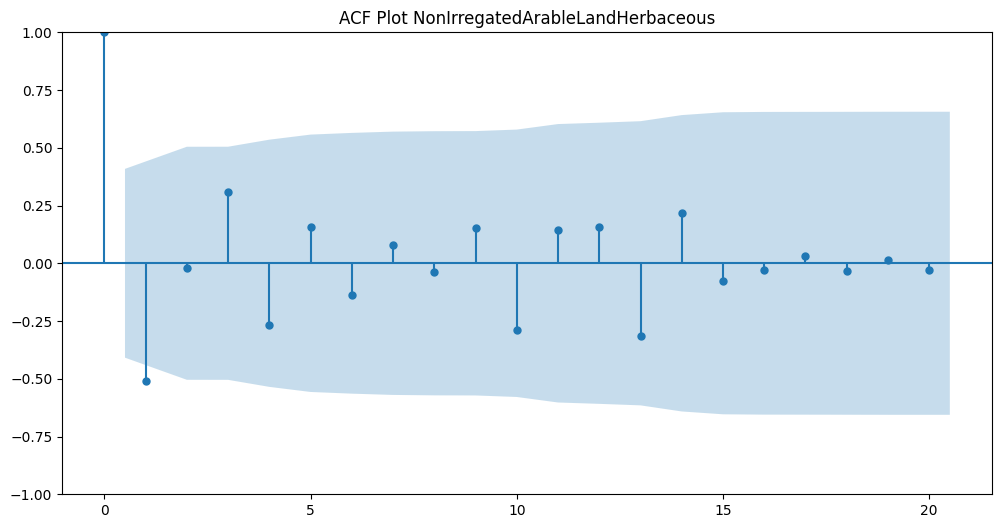

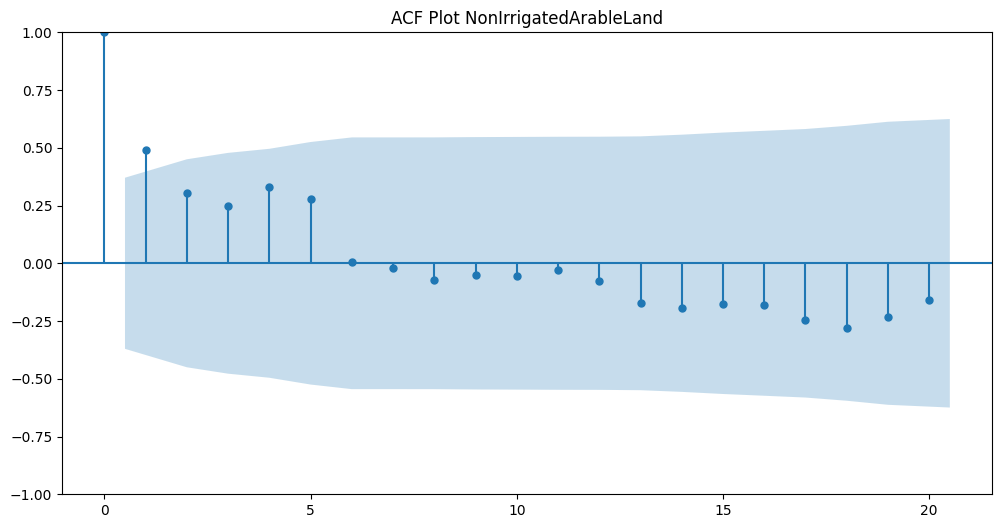

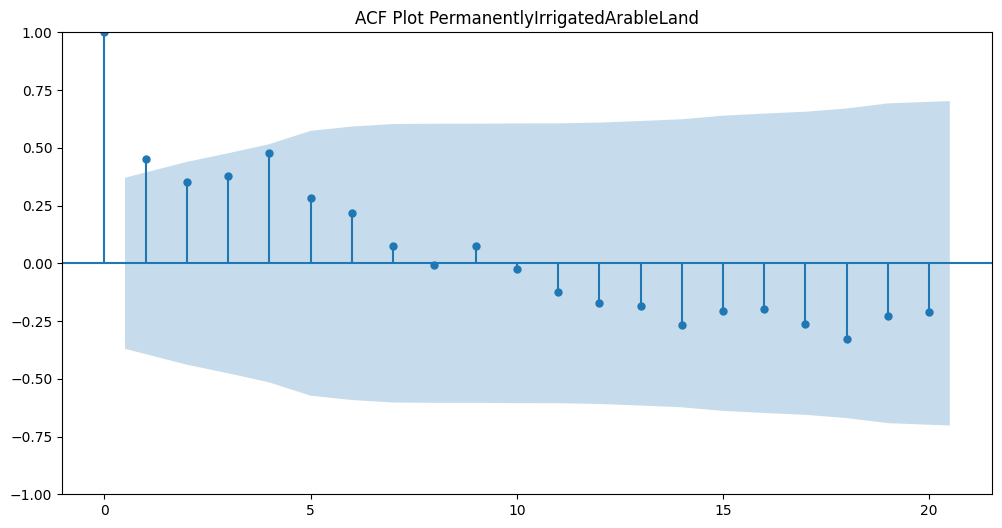

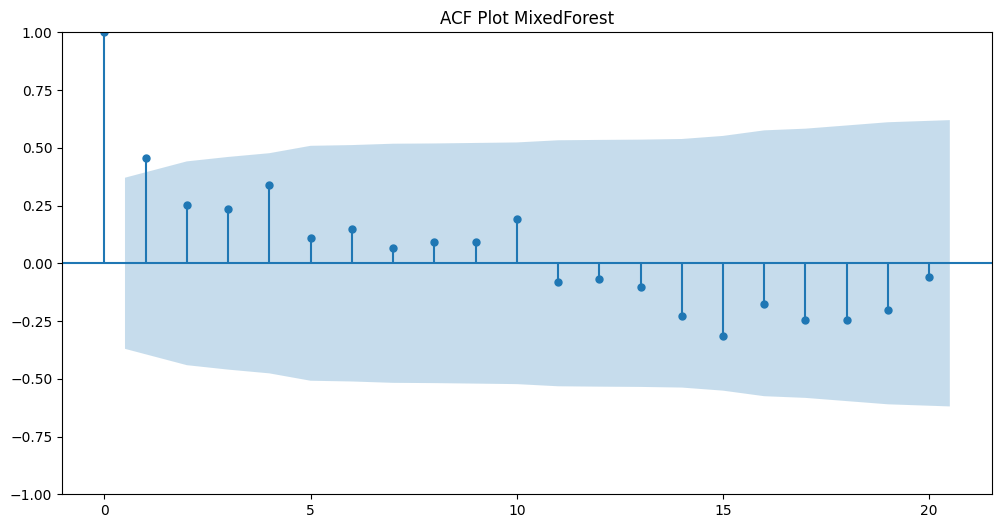

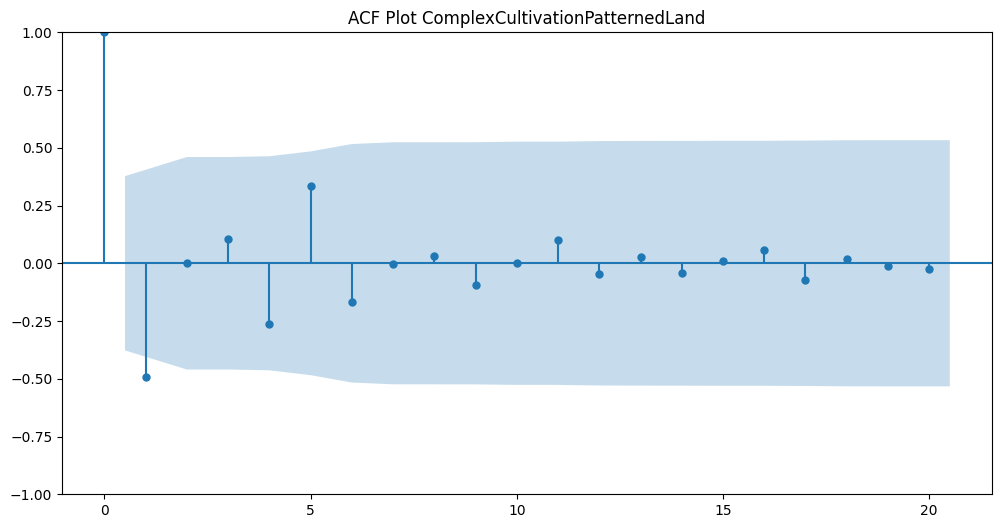

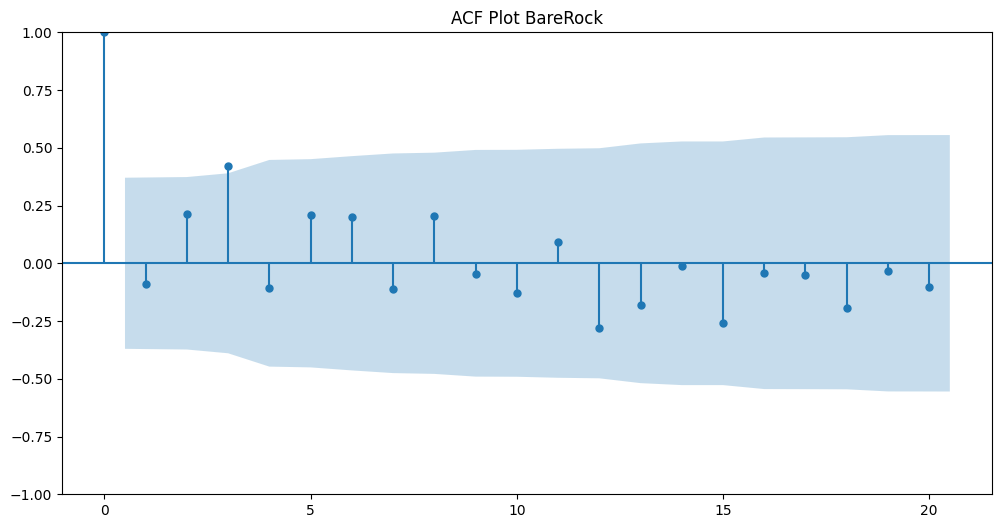

In [141]:
for m in trend:
    plt.figure(figsize=(12, 6))
    plot_acf(last_diference[m], lags=20, ax=plt.gca())
    plt.title('ACF Plot '+etiqueta[m])
    plt.show()


PACF plot

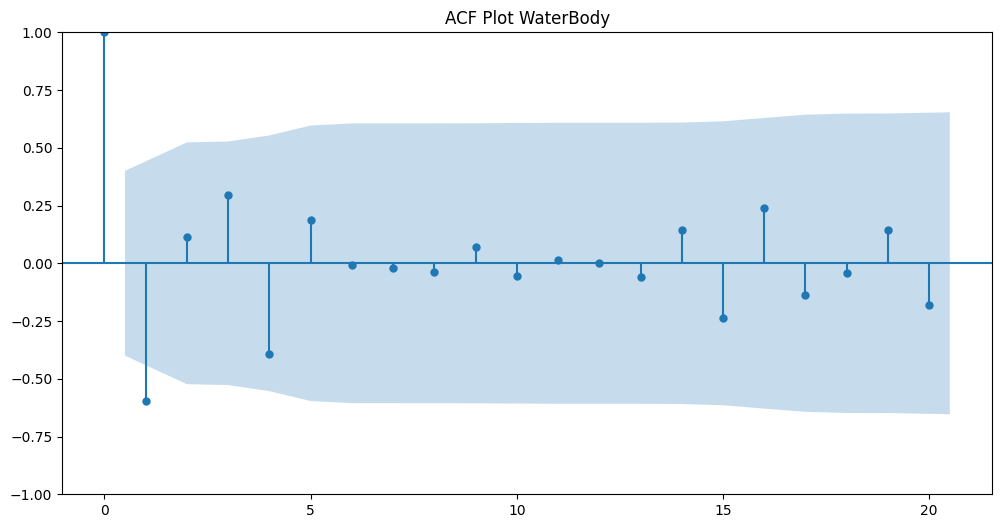

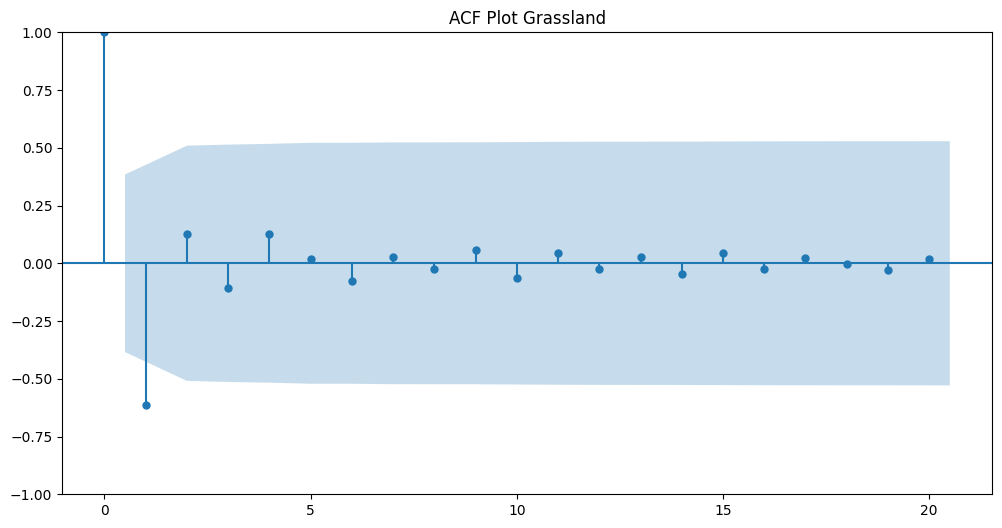

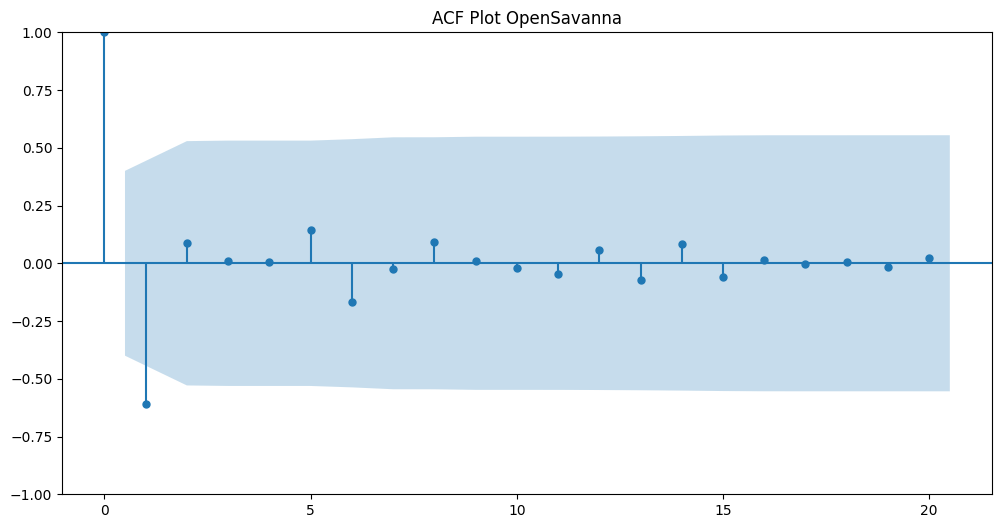

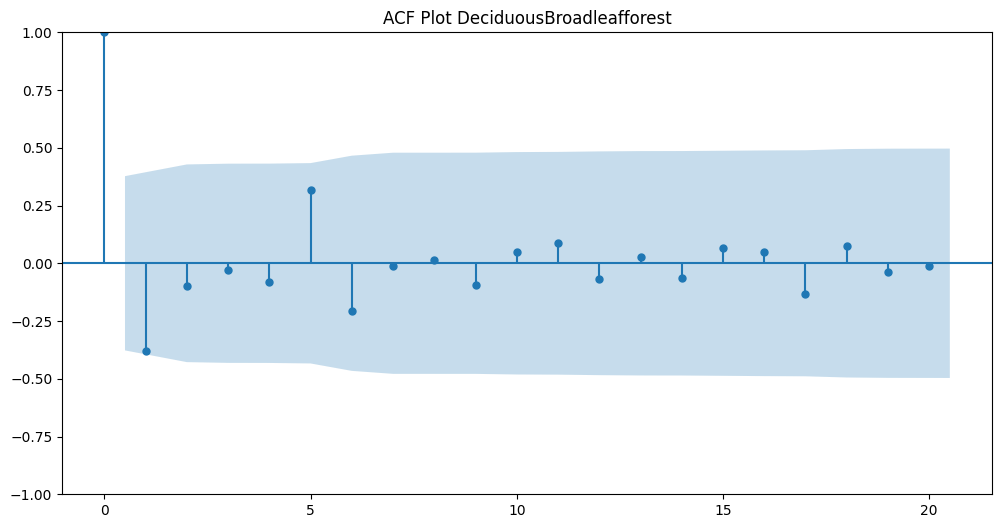

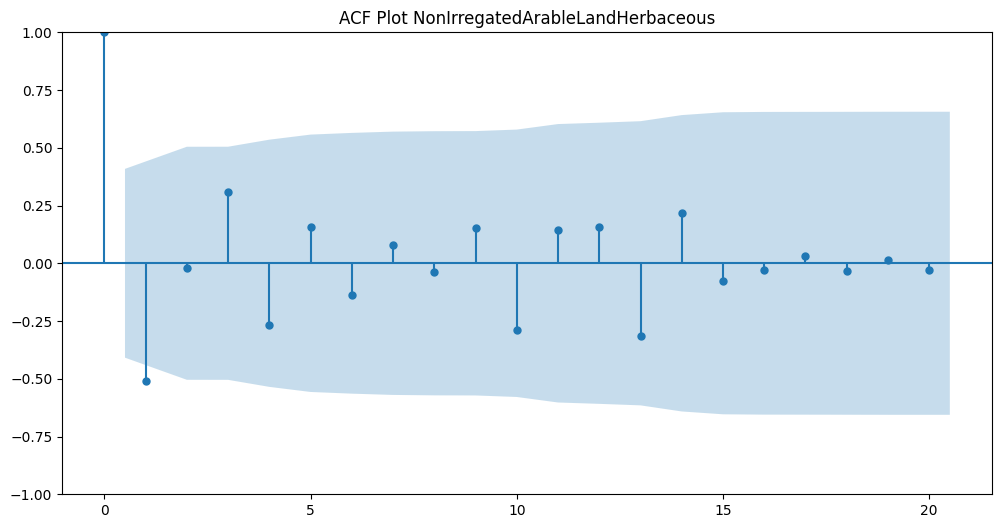

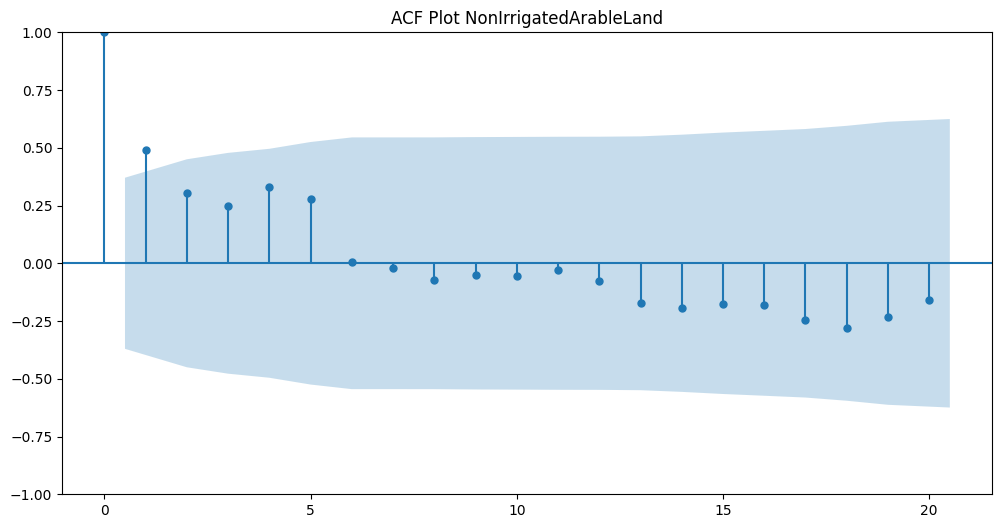

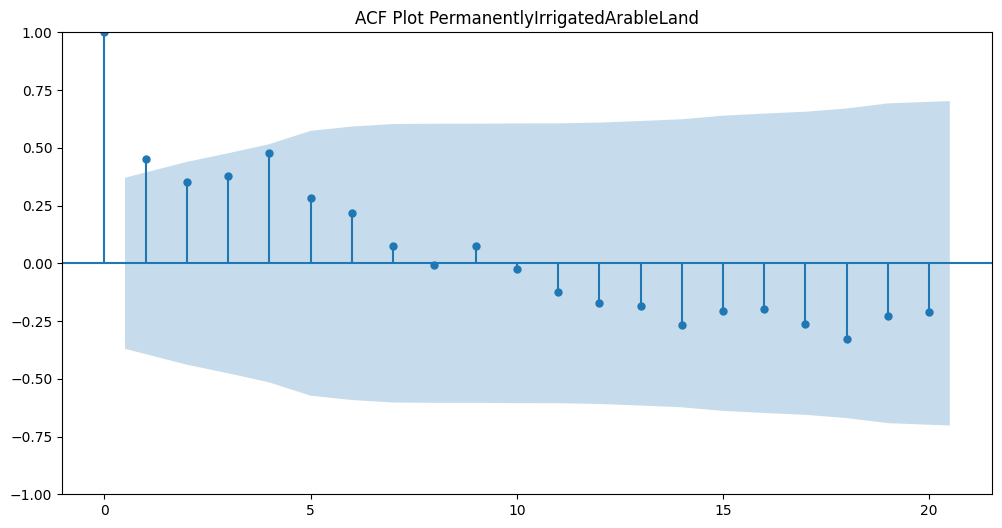

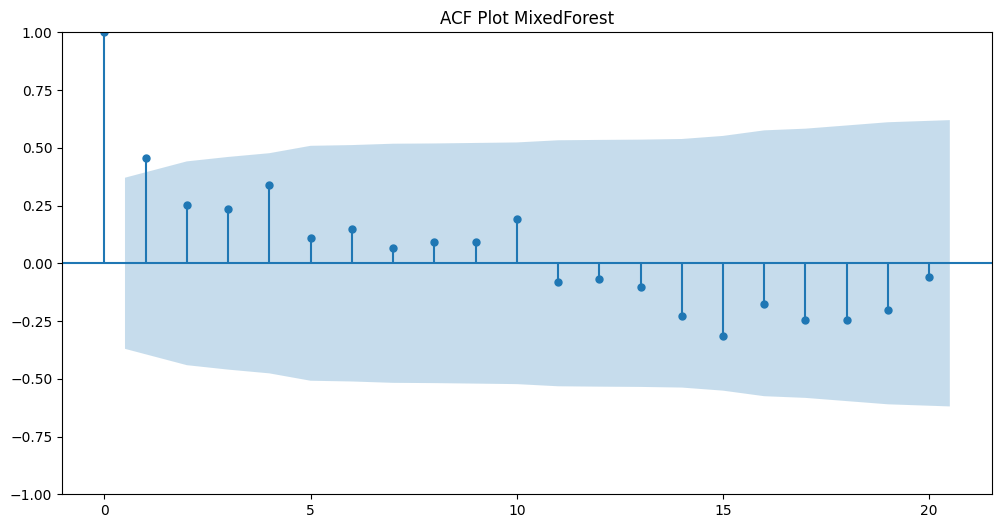

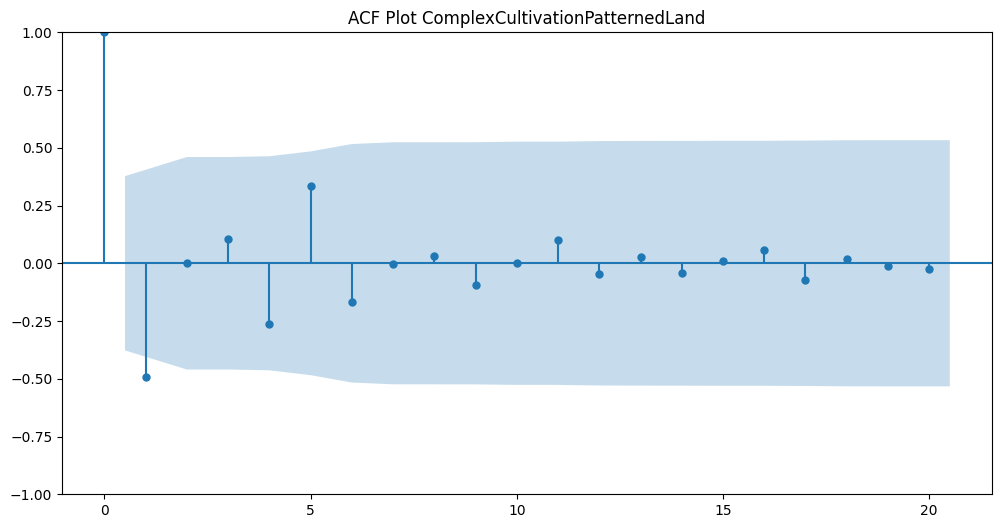

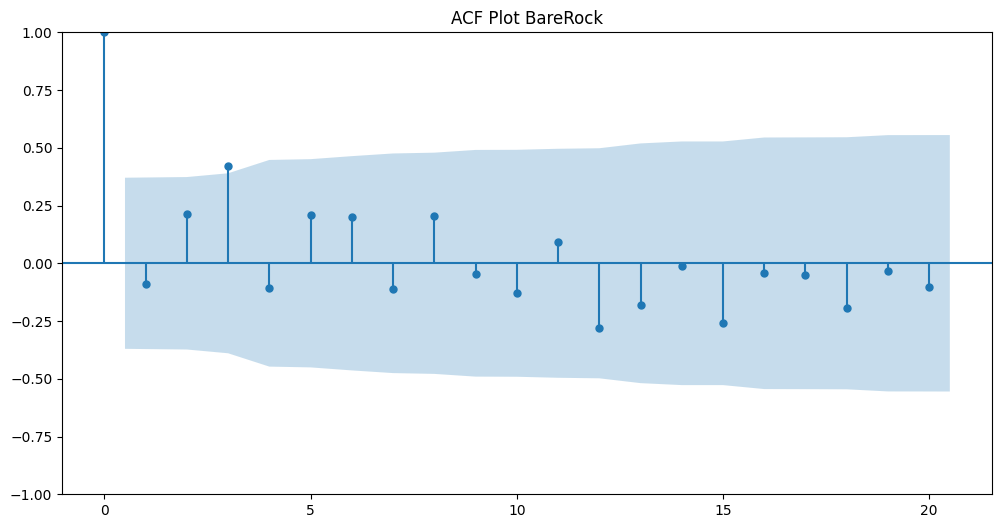

In [142]:
for m in trend:
    plt.figure(figsize=(12, 6))
    plot_acf(last_diference[m], lags=20, ax=plt.gca())
    plt.title('ACF Plot '+etiqueta[m])
    plt.show()

Split the data into training and testing sets

In [156]:
train_size=[[] for k in range(37)]
train=[[] for k in range(37)]
test=[[] for k in range(37)]
for m in trend:
    train_size[m]=int(0.8 * len(last_diference[m]))
    train[m]=last_diference[m][:train_size[m]]
    test[m]=last_diference[m][train_size[m]:]

    

Fit an ARIMA model to the training data

In [160]:
from statsmodels.tsa.arima.model import ARIMA

In [166]:
print(test[6])

[120, -120, 96, -61, 31]


In [169]:
model=[[] for k in range(37)]
model_fit=[[] for k in range(37)]
for m in trend:
    model[m] = ARIMA(train[6], order=(1, 1, 1))
    model_fit[m] = model[m].fit()

Forecast the test data

In [170]:
forecast=[[] for k in range(37)]
for m in trend:
    forecast[m] = model_fit[m].forecast(steps=len(test[m]))

Calculate prediction intervals

In [171]:
residuals=[[] for k in range(37)]
prediction_interval=[[] for k in range(37)]
for m in trend:
    residuals[m] = test[m] - forecast[m]
    prediction_interval[m] = 1.96 * np.std(residuals[m])  # 1.96 for a 95% prediction interval

Plot the forecasts and the actual values with prediction intervals

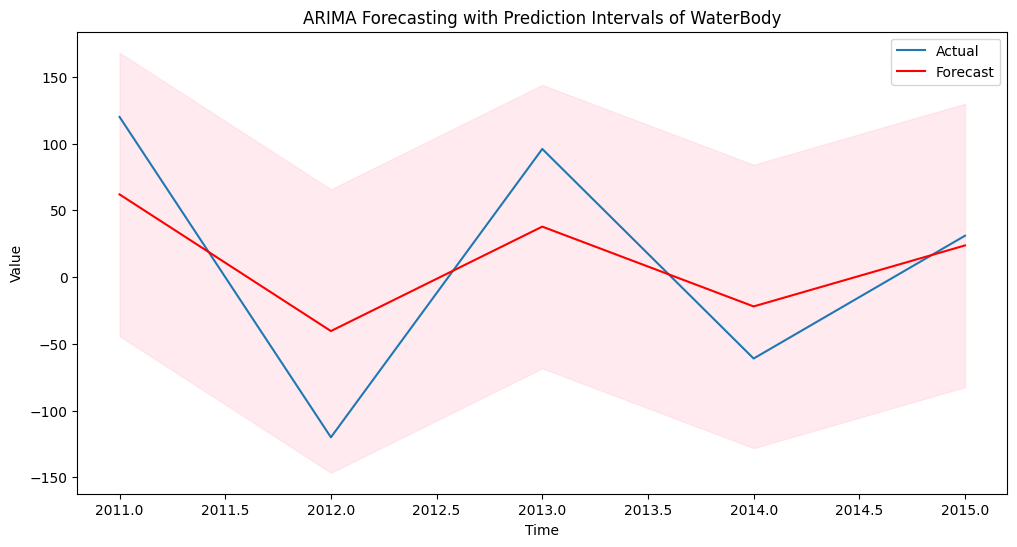

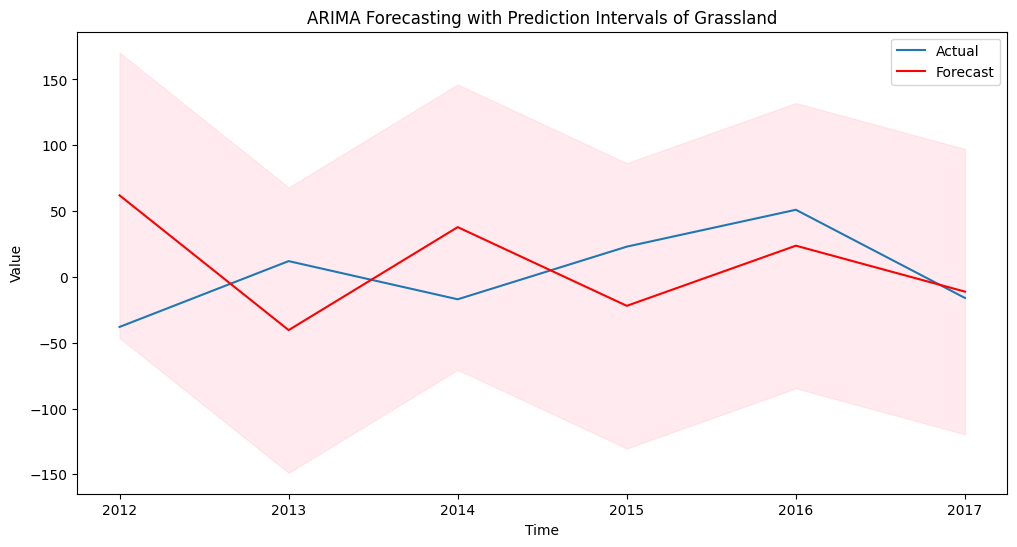

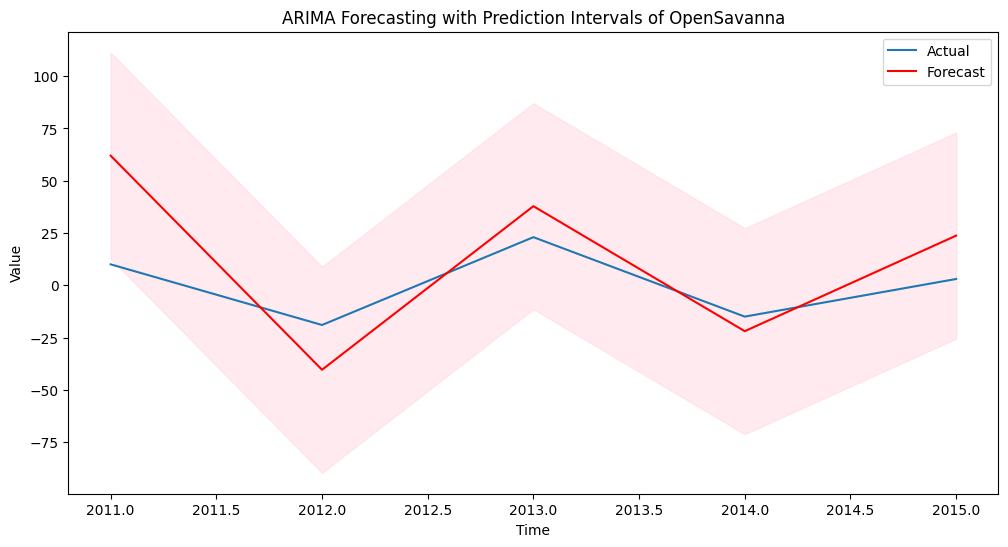

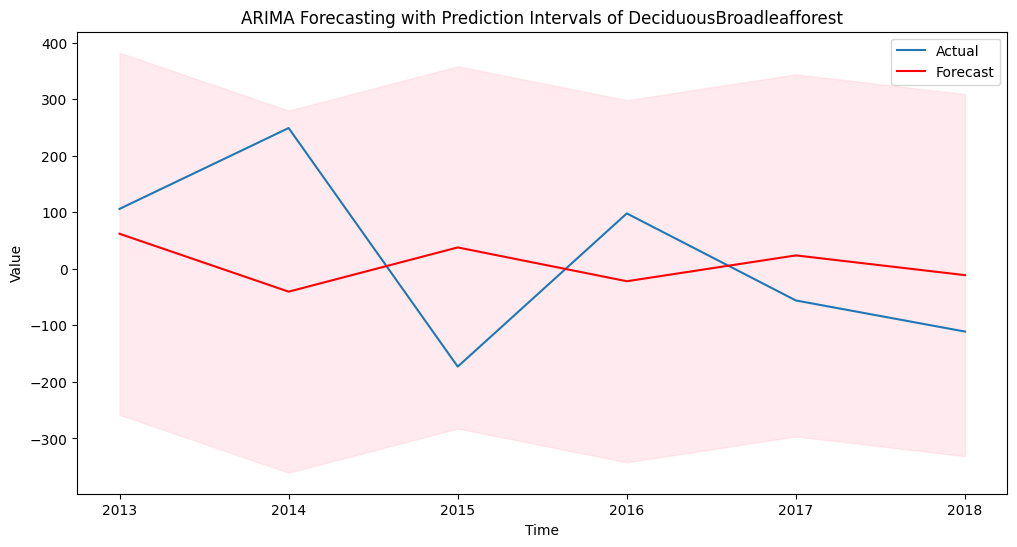

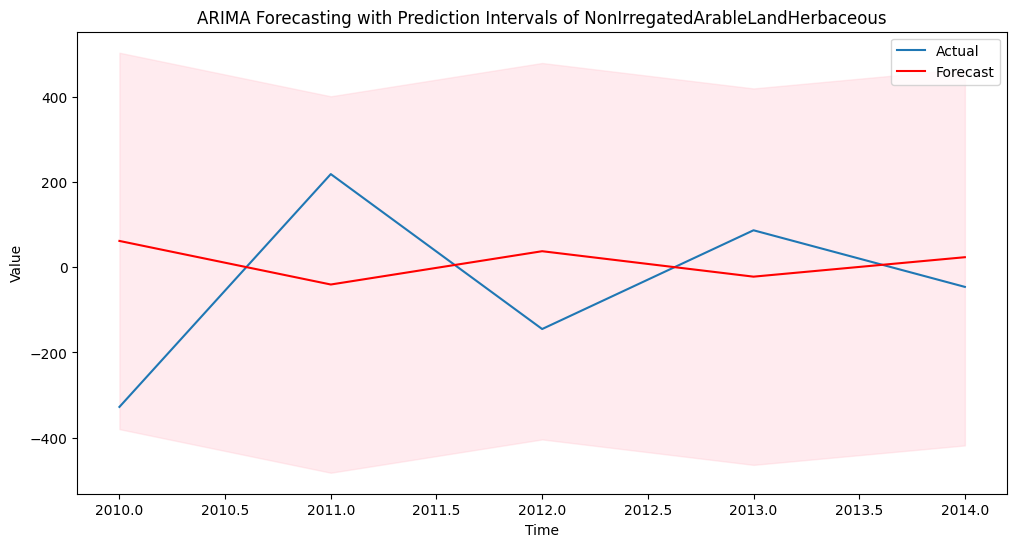

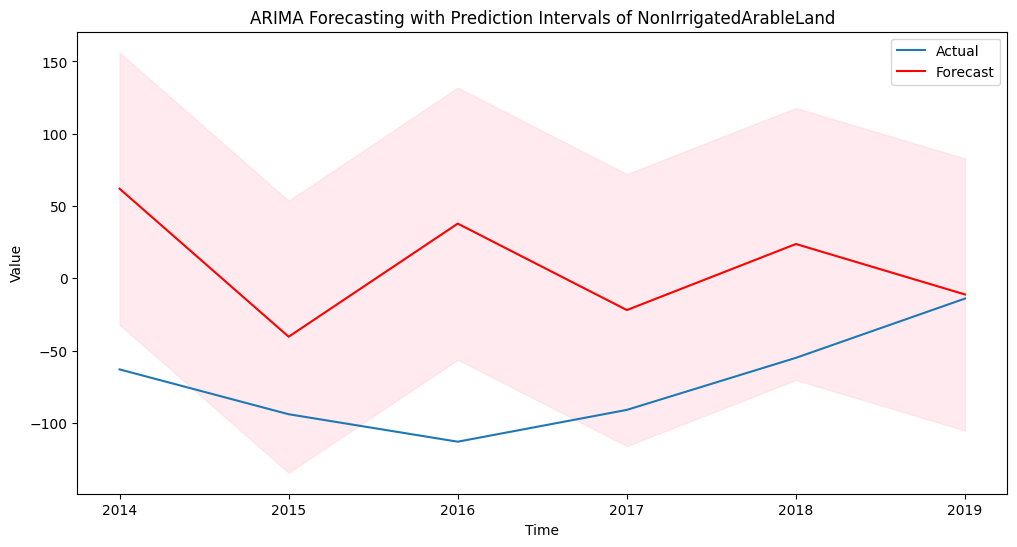

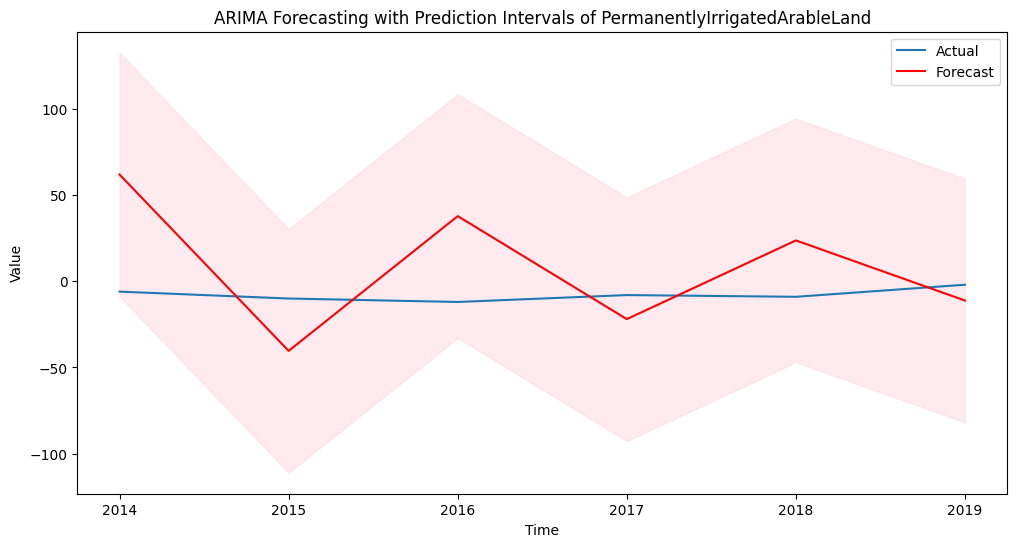

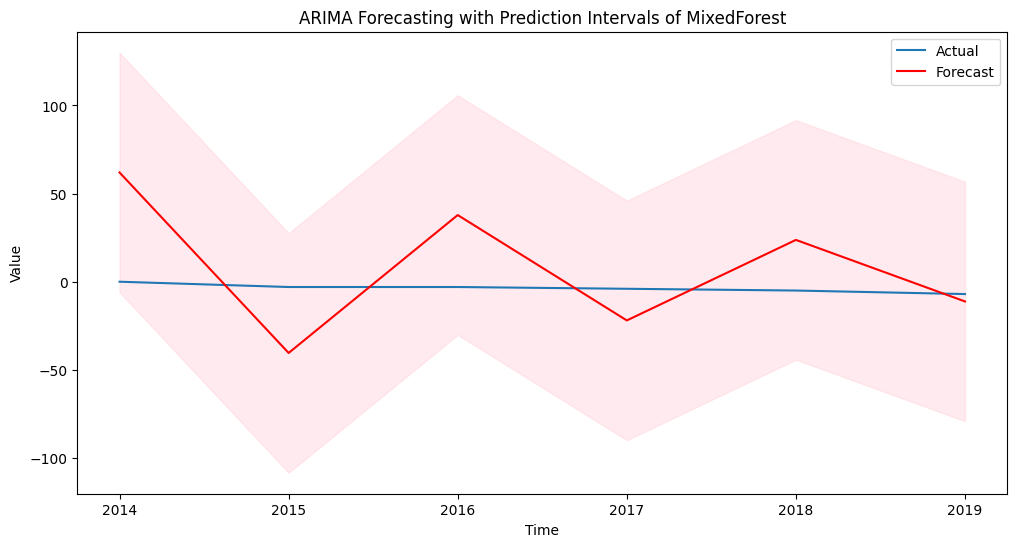

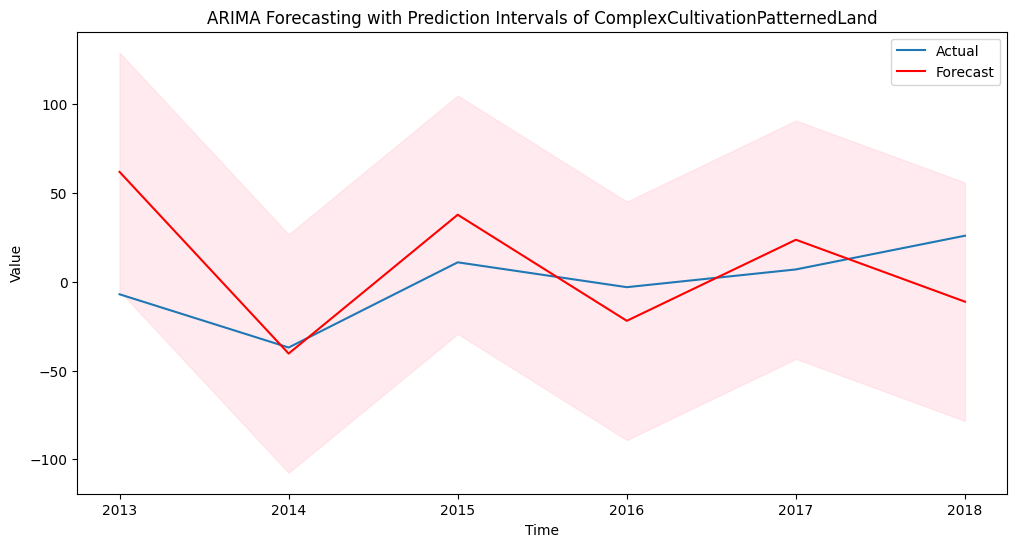

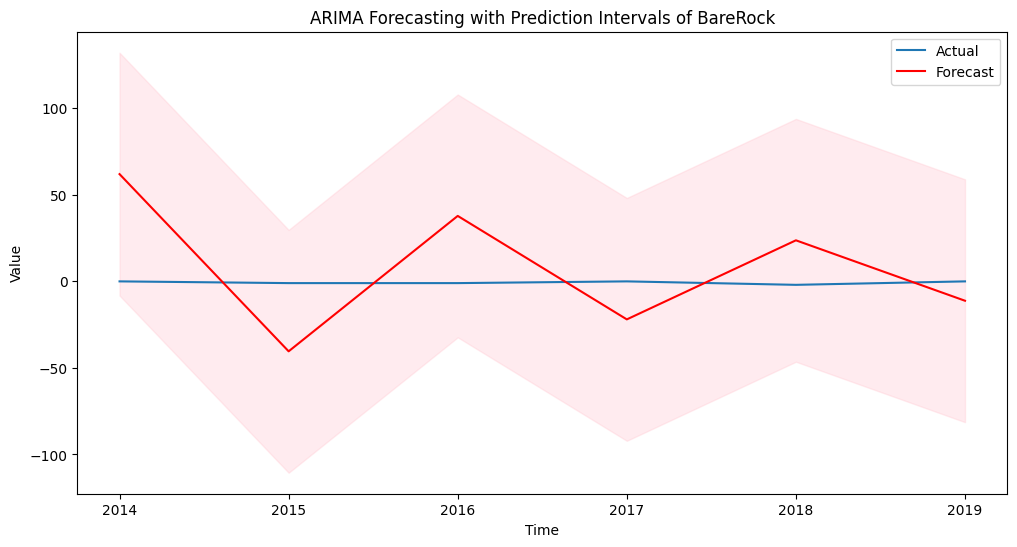

In [172]:
for m in trend:
    plt.figure(figsize=(12, 6))
    plt.plot(Year[train_size[m]:len(Year)-number_of_diferences[m]], test[m], label='Actual')
    plt.plot(Year[train_size[m]:len(Year)-number_of_diferences[m]], forecast[m], label='Forecast', color='red')
    plt.fill_between(Year[train_size[m]:len(Year)-number_of_diferences[m]], forecast[m] - prediction_interval[m], forecast[m] + prediction_interval[m], color='pink', alpha=0.3)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('ARIMA Forecasting with Prediction Intervals of '+etiqueta[m])
    plt.legend()
    plt.show()